<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<div align=center>
			<font face="IranNastaliq" size=30>
				<p></p>
				<p></p>
به نام خدا
				<p></p>
			</font>
		</div>
		<hr/>
		<font color=#43a8a5 size=6>
			<br />
			<div align=center>
 آزمون فرض‌های ناپارامتری
            </div>
		</font>
		<br />
		<hr />
		<style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>
		<div>
			<h3>فهرست مطالب</h3>
			<ul style="margin-right: 0;">
                <li>
					<a href="#sec_intro">
                        مقدمه
                    </a>
				</li>
                <li>
					<a href="#sec_problem">
                        صورت مسئله
                    </a>
				</li>
                <li>
					<a href="#sec_permutation_test">
                        آزمون جایگشت (permutation test)
                    </a>
				</li>
                <li>
					<a href="#sec_telegram_again">
بازگشت به مسئله تلگرام
                    </a>
                </li>
                <li>
                    <a href= "#sec_comparison">
                        مقایسه تست‌های پارامتریک و غیرپارامتریک
                    </a>
                </li>
                <li>
					<a href="#sec_conc">
خلاصه و نتیجه‌گیری
                    </a>
				</li>
			</ul>
		</div>
	</font>
</div>

<p></p>
<br />
<div id="sec_intro" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
مقدمه
        </font>
		<p></p>
		<hr>
پیام رسان تلگرام که محبوب‌ترین وسیله ارتباطی در ایران است، در اردیبهشت ماه سال ۱۳۹۷ فیلتر شد و دسترسی به آن قطع گردید. می‌خواهیم بررسی کنیم که آیا این فیلترینگ تاثیری بر روی میزان مشاهده شدن مطالبی که در تلگرام منتشر می‌شوند گذاشته است یا خیر.
        <br />
<img src="figs/digital.jpeg" style="float:center; width:50%"/>
<br />
	</font>
</div>

<p></p>
<br />
<div id="sec_problem" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
صورت مسئله
        </font>
		<p></p>
		<hr>
        از داده‌های مربوط به متوسط میزان مشاهده روزانه هر مطلب منتشر شده در تلگرام استفاده می‌کنیم. این داده‌ها توسط آزمایشگاه شبکه‌های اجتماعی دانشکده برق و کامپیوتر دانشگاه تهران استخراج شده‌اند.
        <br>
    هر سطر مربوط به یک روز است. ستون اول متوسط بازدید از مطالب منتشر شده در آن روز و ستون دوم  فیلتر بودن یا نبودن تلگرام در آن روز را مشخص می‌کند.
    </font>
</div>

In [1]:
import pandas as pd
data = pd.read_csv("./data/telegram_seen.csv")
data

,Views,Filtered
0,921,No
1,831,No
2,786,No
3,874,No
4,868,No
5,820,No
6,791,No
7,701,Yes
8,726,Yes
9,699,Yes


<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
با استفاده از داده‌هایی که داریم، میانگین بازدید از مطالب را در دوران پیش از فیلترینگ و پس از فیلترینگ محاسبه می‌کنیم و با هم مقایسه می‌کنیم: 
    </font>
</div>

In [2]:
before = data[data.Filtered == "No"]
after = data[data.Filtered == "Yes"]
print('Average views before filtering: '+str(before.mean()[0]))
print('Average views after filtering: '+str(after.mean()[0]))

Average views before filtering: 841.5714285714286
Average views after filtering: 744.4444444444445


<br />
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    مشاهده می‌شود که میانگین بازدید پس از فیلترینگ کاهش یافته است. اکنون می‌خواهیم با استفاده از یک آزمون فرض، فرض کاهش بازدید روزانه مطالب تلگرام را بررسی کنیم.
        <br>
        شاید اولین روشی که به ذهن برسد، استفاده از t-test باشد. اما باید توجه کنیم که در آزمون تی، فرض می‌کنیم که داده‌ها از توزیع نرمال می‌آیند اما در اینجا ما نمی‌توانیم چنین فرضی راجع به داده‌ها داشته باشیم.
    </font>
</div>

<p></p>
<br />
<div id="sec_permutation_test" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
آزمون جایگشت (permutation test)
        </font>
		<p></p>
		<hr>
        آزمون جایگشت (permutation test)  یکی از انواع آزمون‌های غیر پارامتریک (non parametric) است. تفاوت این آزمون‌ها با آزمون‌های پارامتریک در این است که در اینجا فرضی راجع به توزیع متغیرها نمی‌کنیم،  اما مثلا در آزمون تی که یک آزمون پارامتریک است فرض می‌کنیم که داده از توزیع نرمال با واریانس یکسان می‌آیند.
        <br>
        <br>
        فرض کنید ۲ دسته داده A و B داریم.
        دسته اول شامل $n_A$ نمونه و دسته دوم شامل $n_B$ نمونه است.
        فرض صفر این است که این دو دسته توزیع یکسانی دارند. بنابراین اگر فرض صفر  درست باشد، بین این که یک نمونه در دسته A باشد یا در دسته B، تفاوتی نیست. در واقع در صورت وقوع فرض صفر تفاوت معناداری میان دسته‌بندی فعلی (A و B) با یک دسته‌بندی تصادفی وجود ندارد. کاری که در آزمون جایگشت می‌کنیم همین است که دسته‌بندی اصلی را با دسته‌بندی‌های تصادفی (جایگشت‌های مختلف) مقایسه می‌کنیم. حال سوال بعدی آن است که خود عمل مقایسهٔ میان دسته‌بندی‌ها را چگونه انجام دهیم؟ برای این کار باید یک آماره به ازای هر دسته‌بندی محاسبه کنیم. 
        <br>
        فرض کنید از آماره میانگین برای آزمون استفاده می‌کنیم. ابتدا تفاضل میانگین‌های دو دسته یعنی $|\mu_A - \mu_B|$ را محاسبه می‌کنیم.
        می‌خواهیم ببینیم آیا این تفاضل به اندازه کافی بزرگ هست که ما فرض صفر را رد کنیم یا خیر؟
        <br>
        داده‌های دو دسته را تجمیع می‌کنیم، یعنی تمام $n_A + n_B$ نمونه را در نظر می‌گیریم و به ازای همه حالت (جایگشت) های ممکن، داده‌ها را به دو دسته A و B به اندازه‌های $n_A$ و $n_B$ افراز می‌کنیم؛ یعنی تمامی حالت‌های نسبت دادن هر نمونه به دسته A یا B، به طوری که اندازه دسته‌ها به ترتیب $n_A$ و $n_B$ باشد.
        تفاضل میانگین‌های دو دسته را در هر حالت محاسبه می‌کنیم.
        مجموعه تمام تفاضل میانگین‌های به دست آمده، توزیع تمامی حالت‌های ممکن برای اختلاف میانگین دو دسته، به شرط درست بودن فرض صفر است.
        مقدار p-value برابر با نسبت تعداد حالت‌هایی که تفاضل میانگین بزرگتر از تفاضل میانگین اولیه است بر روی تعداد کل حالت‌ها می‌باشد.
        <br>
        دقت کنید که روش توضیح داده شده مربوط به حالتی است که فرض جایگزین ما دوطرفه باشد. اگر فرض جایگزین ما یک طرفه باشد، باید به جای $|\mu_A-\mu_B|$ از $\mu_A-\mu_B$ استفاده کنیم.
        <br>
        توجه کنید که در این آزمون تنها فرض استفاده شده این است که بتوانیم نمونه‌ها را به طور یکسان به هرکدام از دو دسته نسبت دهیم.
	</font>
</div>



<p></p>
<br />
<div id="sec_telegram_again" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
بازگشت به مسئله تلگرام
        </font>
		<p></p>
		<hr>
       آزمون جایگشت به کمک مثال روشن تر بیان می‌شود. قدم به قدم  آزمون جایگشت را بر روی مساله تلگرام اجرا می‌کنیم. $\alpha$ را برابر 0.05 در نظر می‌گیریم.<br>
        در مساله تلگرام، ما دو دسته داده داریم، دسته اول داده‌های مربوط به قبل فیلترینگ و دسته دوم مربوط به بعد فیلترینگ.
        ابتدا تفاضل میانگین‌های دو دسته را محاسبه می‌کنیم:
       </font>
</div>

In [3]:
obsDiff = abs(before.Views.mean()-after.Views.mean())
print('Difference in Averages is: ' + str(obsDiff))

Difference in Averages is: 97.1269841269841


<p></p>
<div id="sec_jam_again" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
اکنون تمامی حالات ممکن نسبت دادن $n_A$ نمونه به دسته A و $n_B$ نمونه به دسته B را می‌سازیم:
    </font>
</div>

In [4]:
from itertools import combinations
import numpy as np

nA = 7
nB = 9

gathered = data.Views
allA = np.array(list(combinations(gathered,nA)))
numPerms = len(allA)
allB = np.zeros(shape= (numPerms,nB),dtype = int)
for i in range(numPerms):
    allB[i] = np.array([x for x in gathered if x not in allA[i]])

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    numPerms برابر با تعداد تمامی حالات ممکن است.
        <br>
    allA و allB دو ماتریس هستند که ابعادشان به ترتیب $numPerms \times n_A$ و $numPerms \times n_B$ است.
        به عبارتی به ازای جایگشت i ام از numPerms، $n_A$ تا نمونه در سطر iام ماتریس allA و $n_B$ نمونه بقیه در سطر iام ماتریس allB قرار گرفته است.
        مثلا در جایشگت 100ام، اعداد زیر در گروه A قرار دارند:
    </font>
</div>

In [5]:
print(allA[100])

[921 831 786 874 791 701 726]


<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    و اعداد زیر هم در گروه B قرار دارند:
</font>
</div>

In [6]:
print(allB[100])

[868 820 699 761 811 668 814 680 840]


<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
اکنون به ازای هر جایگشت، تفاضل میانگین دو دسته را محاسبه می‌کنیم:
    </font>
</div>

In [7]:
meansA = np.mean(allA,axis=1)
meansB = np.mean(allB,axis=1)
diffs = abs(meansA-meansB)

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
این تفاضلات میانگین‌های به دست آمده به ازای هر جایگشت، در واقع توزیع اختلاف میانگین داده‌های گروه A و B با فرض درست بودن فرض صفر است. 
    اگر هیستوگرام این توزیع را رسم کنیم:</font>
</div>

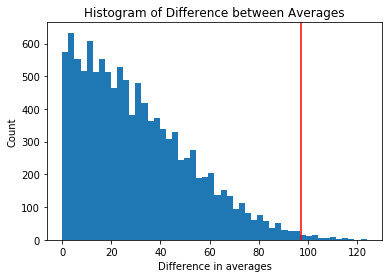

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(diffs,bins = 50)
plt.axvline(x = obsDiff,color = "r")
plt.title("Histogram of Difference between Averages")
plt.xlabel("Difference in averages")
plt.ylabel("Count")
plt.show()

<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
در شکل بالا، خط قرمز، اختلاف میانگین‌ها در مشاهده اصلی را نشان می‌دهد. 
        p-value برابر است با احتمال اینکه اختلاف میانگین‌ها برابر یا بزرگتر از آن باشد، یعنی:
    </font>
</div>

In [11]:
greater = diffs[diffs >= obsDiff]
pValue = len(greater) / numPerms
print("Calculated P-value is: "+ str(pValue))

Calculated P-value is: 0.006555944055944056


<p></p>
<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
    مشاهده می‌کنیم که مقدار p-value به دست آمده، کمتر از $\alpha=0.05$ است؛ بنابراین فرض صفر رد می‌شود یعنی طبق این داده‌ها، فیلترینگ تلگرام باعث کاهش بازدید از مطالب آن شده است.
        <br>
        <br>
        سوالی که این‌جا مطرح می‌شود آن است که اگر مقدار P-valueی به دست‌آمده بیش‌تر از $\alpha$ی تعیین‌شده بود آن‌گاه نتیجه‌ی آزمون چه بود؟ آیا می‌توانستیم بگوییم فرض صفر صحیح است و میزان بازدیدهای پست‌های تلگرام قبل و بعد از فیلترینگ آن تغییری نکرده؟ پاسخ این سوال خیر است. اگر بخواهیم دقیق باشیم، در صورتی که مقدار به دست‌آمده بیش‌تر از $\alpha$ باشد تنها می‌توانیم بگوییم با انجام آزمون نتوانستیم فرض صفر را رد کنیم. با این حال آن را تأیید نیز نکردیم و ممکن است همین آزمایش با تعداد دادهٔ بیش‌تر یا حتی آمارهٔ مقایسهٔ دیگر منجر به رد فرض صفر شود.
        <br>
        <br>
        خلاصه‌ای از مراحل بالا در <a href = "https://www.jwilber.me/permutationtest/">این لینک</a> برای تست اثر یک نوع شامپو روی رشد پشم شتر لاما قابل مشاهده است.
        <br>
        <br>
        مراحل اجرای آزمون جایگشت قدم به قدم نشان داده شد.
    </font>
</div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=darkpink size=6>
تمرین:
        </font>
    آزمون جایگشت را بر روی داده‌های A و B زیر اعمال کنید.
</font>
</div>



In [83]:
A = [40,42,39,57,53]
B = [63,62,51,64,75,78]
testdata = pd.DataFrame({'var' : A+B,'type' : ['A']*len(A) + ['B']*len(B)})

<p></p>
<br/>
<div id="sec_comparison" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<p></p>
        <font color=#FF7500 size=6>
            مقایسه‌ی تست‌های پارامتریک و ناپارامتریک
        </font>
		<hr>
        دانستن کوهی از آزمون‌های فرض، هنگامی که ندانیم که در هر موقعیت از کدام آن‌ها استفاده کنیم، نه تنها مفید واقع نمی‌شود، بلکه ممکن 
است با استفاده‌ی غلط از این آزمون‌ها نتایج غلط و اشتباهی را استخراج کنیم و آن‌ها را به عنوان واقعیت در نظر بگیریم.
تست‌های ناپارامتریک با فراگیر شدن کامپیوتر‌ها امکان‌پذیر شده‌اند و از لحاظ محاسباتی هزینه‌بر و گاهی غیرممکن هستند.
چند نکته هست که همیشه در استفاده از تست‌های ناپارامتریک باید مورد توجه ما باشند.
        <ul>
            <li>
               تست‌های ناپارامتریک معمولا وقتی مفید هستند که تعداد داده‌های ما اندک باشد. بسیاری از افراد فکر می‌کنند که تست‌های ناپارامتریک وقتی مفید هستند، که داده‌های ما از توزیع نرمال پیروی نکنند. در واقع عقیده‌ی عمومی بر این است که چون این تست‌ها توزیع نرمال را برای داده‌ها فرض نمی‌کنند، بنابراین وقتی داده‌ها از توزیع نرمال پیروی نمی‌کنند این تست‌ها انتخاب‌های بهتری هستند. اما در واقع وقتی تعداد نمونه‌های ما زیاد هستند، در بسیاری از موارد، به علت قانون حد مرکزی، تست‌های پارامتری هم بسیار دقیق عمل می‌کنند.
            </li>
            <li>
                تست‌های ناپارامتری هنگامی که تعداد داده‌ها کم هستند و از توزیع نرمال پیروی نمی‌کنند، آزمون‌های بهتری هستند.
            </li>
            <li>
                برای دیدن یک مقایسه‌ی جامع‌تر، مطالعه‌ی 
               <a href = "http://statisticsbyjim.com/hypothesis-testing/nonparametric-parametric-tests/">این</a> 
                لینک را به شما توصیه می‌کنیم.
            </li>
        </ul>
        </font>
</div>

<p></p>
<br/>
<div id="sec_conc" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
خلاصه و نتیجه‌گیری
        </font>
		<p></p>
		<hr>
        در این بخش با موارد زیر آشنا شدیم:
        <ul>
            <li>
            تفاوت آزمون‌های پارامتریک و غیر پارامتریک
            <ul>
                <li>
                    کاربرد و زمان استفاده از هر کدام از آزمون‌ها
                </li>
                <li>
                    تفاوت معنایی پارامتریک و غیرپارامتریک
                </li>
            </ul>
            </li>
            <li>
            آزمون جایگشت به عنوان یک آزمون غیر پارامتریک
            <ul>
                <li>
                    دسته‌بندی و آمارهٔ مقایسه دسته‌ها
                </li>
                <li>
                    فرآیند تولید جایگشت‌ها و آماره‌ها
                </li>
                <li>
                    شرایط رد یا عدم رد کردن فرض صفر
                </li>
            </ul>
            </li>
            <li>
            پیاده‌سازی آزمون جایگشت در پایتون
            </li>
        </ul>
	</font>
</div>

<p></p>
<br/>
<div id="sec_refs" style="direction:rtl;line-height:300%;">
	<font face="XB Zar" size=5>
		<font color=#FF7500 size=6>
منابع
        </font>
		<hr>       
        <ul>
            <li>
                http://statweb.stanford.edu/~joftius/slides/nonpara.pdf
            </li>
            <li>
                https://en.wikipedia.org/wiki/Resampling_(statistics)#Permutation_tests
            </li>
            <li>    https://thomasleeper.com/Rcourse/Tutorials/permutationtests.html
            </li>
            <li>
                http://rcompanion.org/handbook/K_01.html
            </li>
            <li>
کانال تلگرام "تلگرافی" آزمایشگاه شبکه‌های اجتماعی دانشکده برق و کامپیوتر دانشگاه تهران                </li>
        </ul>
	</font>
</div>